In [1]:
# Loan Default Prediction

In [2]:
# import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
# import data

In [5]:
df_train=pd.read_csv(r"C:\Users\SURAJ\Desktop\jupyter\projects\Random forest\train.csv")

In [6]:
df_test=pd.read_csv(r"C:\Users\SURAJ\Desktop\jupyter\projects\Random forest\Test.csv")

In [7]:
# Data Details

In [8]:
df_train

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [9]:
df_test

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


In [10]:
df_train.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [11]:
df_test.columns

Index(['ID', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'],
      dtype='object')

In [12]:
df_train.shape, df_test.shape

((252000, 13), (28000, 12))

In [13]:
df_train.size, df_test.size

(3276000, 336000)

In [14]:
df_train.sample(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
153139,153140,8462658,53,16,single,rented,yes,Lawyer,Dhanbad,Jharkhand,12,12,0
77616,77617,5792043,71,6,single,norent_noown,yes,Graphic_Designer,Panipat,Haryana,6,11,0
174104,174105,4022242,69,17,single,rented,no,Magistrate,Panihati,West_Bengal,9,12,0
57598,57599,250306,23,15,single,rented,no,Design_Engineer,Nadiad,Gujarat,10,14,1
217701,217702,8636518,29,9,single,rented,no,Physician,Unnao,Uttar_Pradesh,8,10,0
157613,157614,1509614,25,0,married,rented,yes,Firefighter,Vijayanagaram,Andhra_Pradesh,0,13,1
177856,177857,2522107,30,5,single,rented,no,Magistrate,Dibrugarh,Assam,5,13,0
1832,1833,4521844,64,2,single,rented,no,Engineer,Ramgarh,Jharkhand,2,12,0
23750,23751,4708902,64,17,single,rented,no,Politician,Avadi,Tamil_Nadu,14,13,0
181072,181073,7239452,62,18,single,rented,yes,Civil_servant,Proddatur,Andhra_Pradesh,5,13,0


In [15]:
df_test.sample(10)

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
27174,27175,5712077,21,0,single,rented,no,Police officer,Mau,Uttar Pradesh,0,12
22302,22303,2845899,64,9,single,rented,yes,Air traffic controller,Durg,Chhattisgarh,9,11
9977,9978,18944,43,18,single,rented,no,Fashion Designer,Amritsar,Punjab,14,10
11096,11097,9043837,22,6,single,rented,yes,Technology specialist,Haldia,West Bengal,6,12
19273,19274,8856107,53,20,single,rented,no,Civil engineer,Panchkula,Haryana,8,12
4113,4114,9224297,69,19,married,owned,yes,Designer,Bahraich,Uttar Pradesh,11,14
13834,13835,2811475,60,5,single,rented,yes,Engineer,Etawah,Uttar Pradesh,5,13
10896,10897,6794531,68,20,single,rented,no,Hotel Manager,Vadodara,Gujarat,14,10
23288,23289,8822942,65,13,single,owned,no,Technical writer,Nizamabad,Telangana,8,12
21442,21443,3204106,27,17,single,rented,no,Magistrate,Ludhiana,Punjab,7,12


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 28000 non-null  int64 
 1   Income             28000 non-null  int64 
 2   Age                28000 non-null  int64 
 3   Experience         28000 non-null  int64 
 4   Married/Single     28000 non-null  object
 5   House_Ownership    28000 non-null  object
 6   Car_Ownership      28000 non-null  object
 7   Profession         28000 non-null  object
 8   CITY               28000 non-null  object
 9   STATE              28000 non-null  object
 10  CURRENT_JOB_YRS    28000 non-null  int64 
 11  CURRENT_HOUSE_YRS  28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


In [18]:
round(df_train.describe())

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.0,252000.0,252000.0,252000.0,252000.0,252000.0,252000.0
mean,126000.0,4997117.0,50.0,10.0,6.0,12.0,0.0
std,72746.0,2878311.0,17.0,6.0,4.0,1.0,0.0
min,1.0,10310.0,21.0,0.0,0.0,10.0,0.0
25%,63001.0,2503015.0,35.0,5.0,3.0,11.0,0.0
50%,126000.0,5000694.0,50.0,10.0,6.0,12.0,0.0
75%,189000.0,7477502.0,65.0,15.0,9.0,13.0,0.0
max,252000.0,9999938.0,79.0,20.0,14.0,14.0,1.0


In [19]:
round(df_test.describe())

,ID,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0
mean,14000.0,5029563.0,50.0,10.0,6.0,12.0
std,8083.0,2864938.0,17.0,6.0,4.0,1.0
min,1.0,10310.0,21.0,0.0,0.0,10.0
25%,7001.0,2545414.0,35.0,5.0,3.0,11.0
50%,14000.0,5046744.0,50.0,10.0,6.0,12.0
75%,21000.0,7474639.0,65.0,15.0,9.0,13.0
max,28000.0,9999814.0,79.0,20.0,14.0,14.0


In [20]:
df_train.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [21]:
df_test.isnull().sum()

ID                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
dtype: int64

In [22]:
test_pass=df_test['ID']
test_pass

0            1
1            2
2            3
3            4
4            5
         ...  
27995    27996
27996    27997
27997    27998
27998    27999
27999    28000
Name: ID, Length: 28000, dtype: int64

In [23]:
# drop unwanted columns
df_train.drop("Id",inplace=True,axis=1)

In [24]:
df_test.drop("ID",inplace=True,axis=1)

In [25]:
df_train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [26]:
df_test

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...
27995,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


In [27]:
for i in df_train:
  print(i,':',df_train[i].nunique())

Income : 41920
Age : 59
Experience : 21
Married/Single : 2
House_Ownership : 3
Car_Ownership : 2
Profession : 51
CITY : 317
STATE : 29
CURRENT_JOB_YRS : 15
CURRENT_HOUSE_YRS : 5
Risk_Flag : 2


In [28]:
for i in df_test:
  print(i,':',df_test[i].nunique())

Income : 9916
Age : 59
Experience : 21
Married/Single : 2
House_Ownership : 3
Car_Ownership : 2
Profession : 51
CITY : 317
STATE : 29
CURRENT_JOB_YRS : 15
CURRENT_HOUSE_YRS : 5


In [29]:
df_train['Risk_Flag'].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [30]:
# from Value counts on Risk_Flag we got to know the data is imbalance

# Visualization

In [31]:
# Data visualization on train data

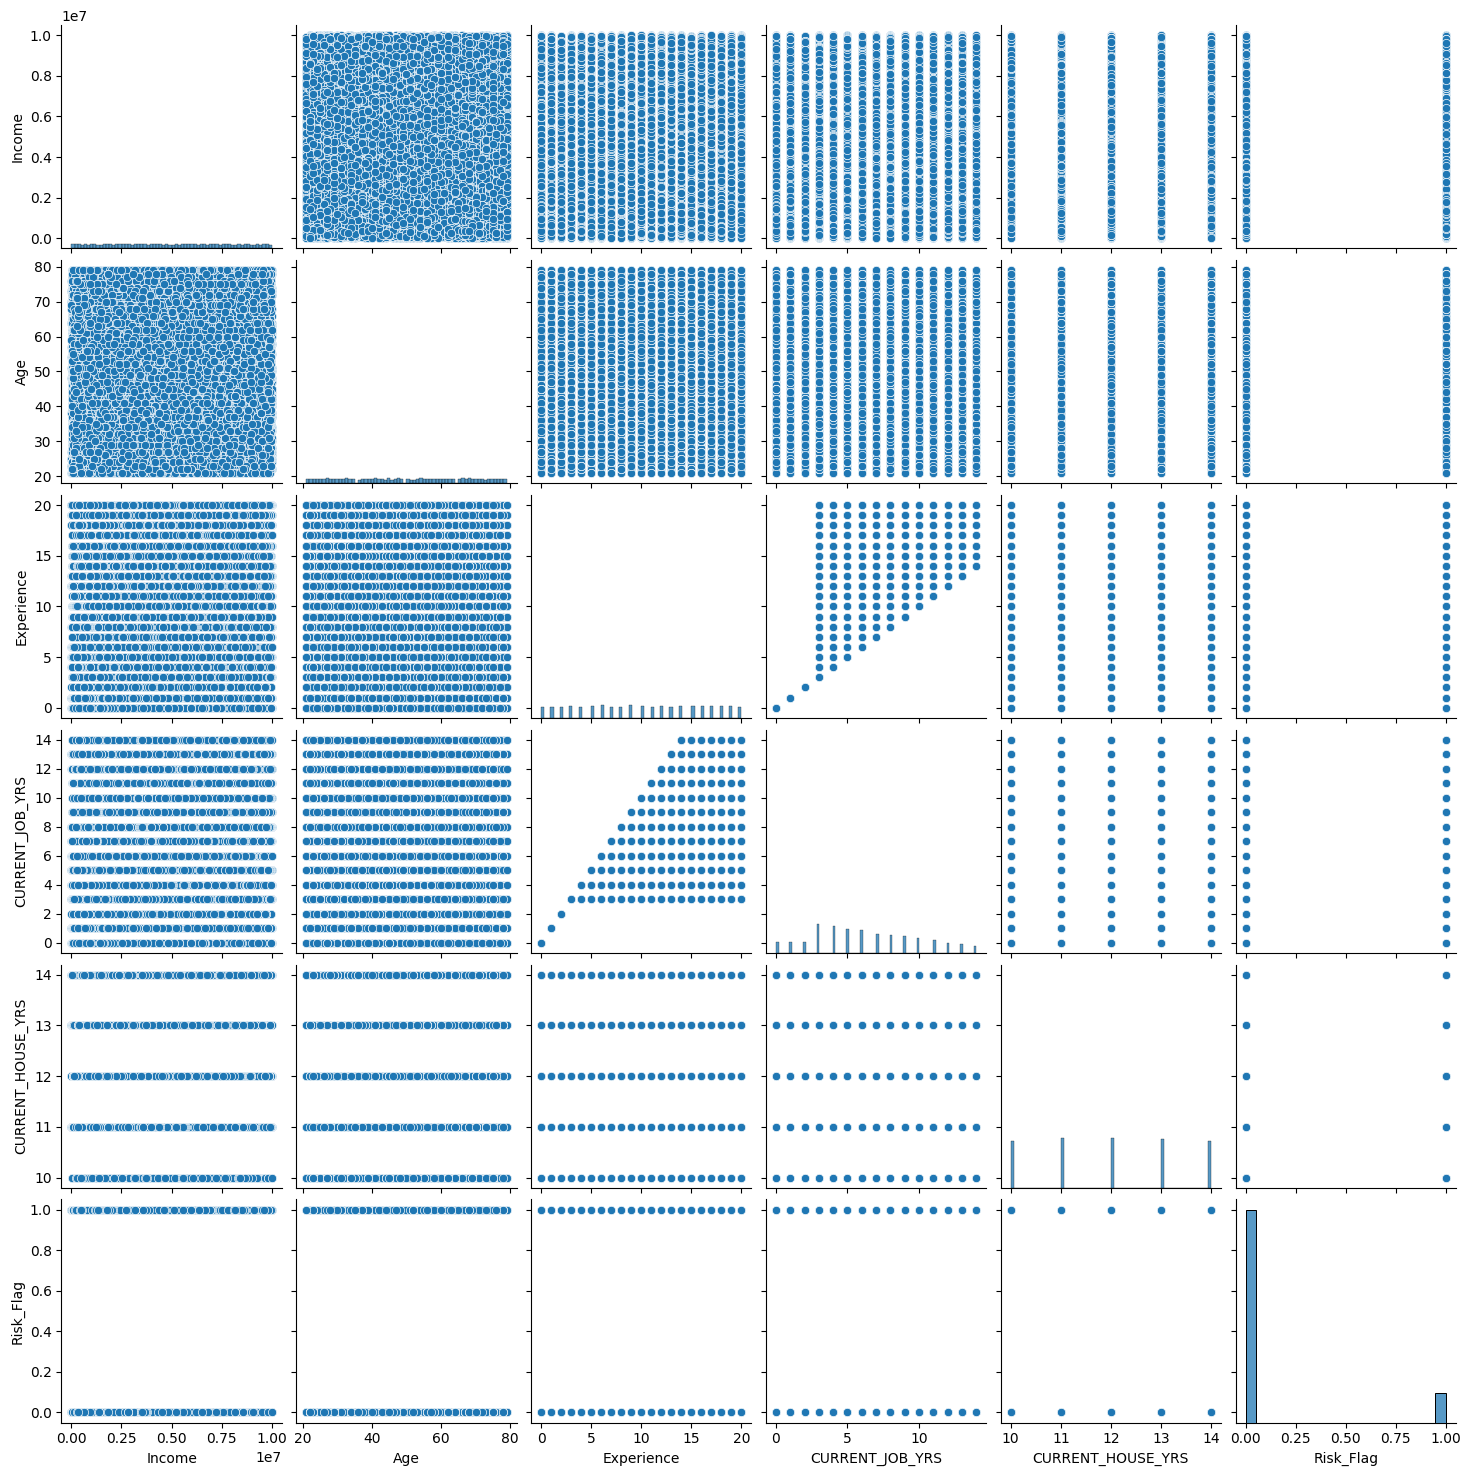

In [32]:
sns.pairplot(df_train)

In [33]:
df_train_features=['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']

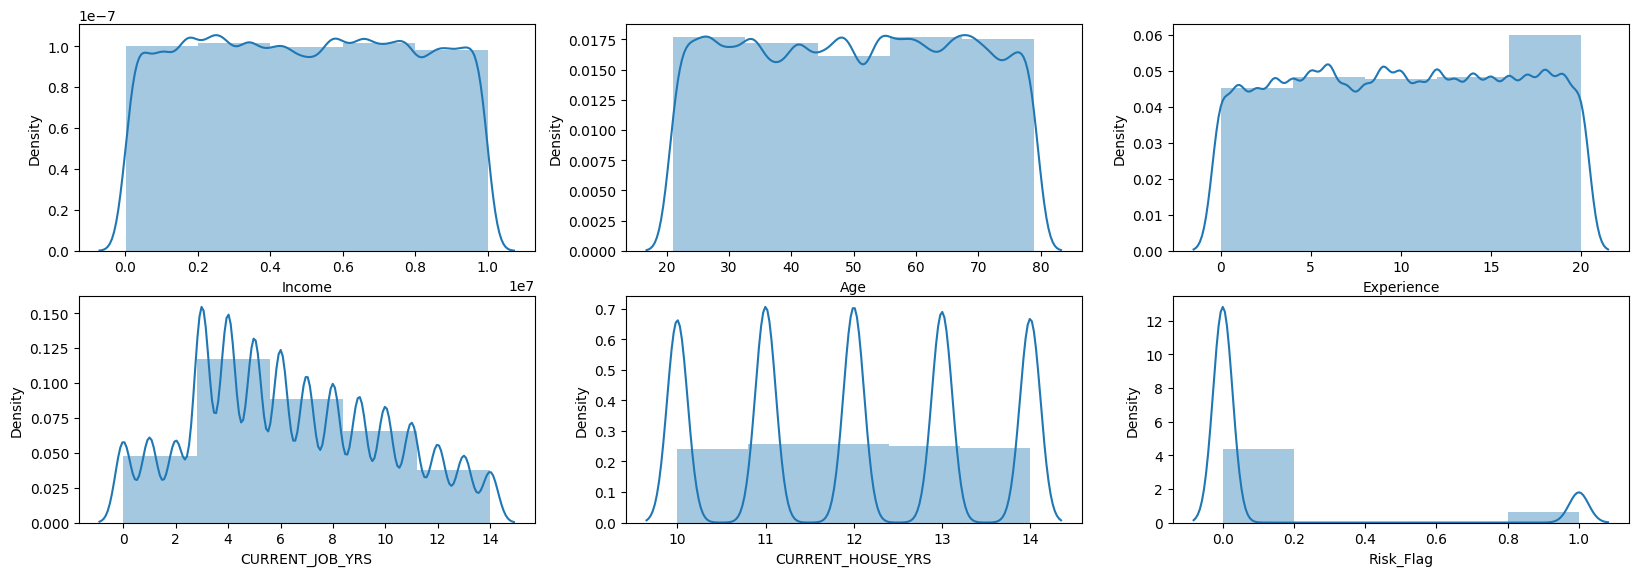

In [34]:
plt.figure(figsize=(20,10))
k=1
for feature in df_train_features:
  plt.subplot(3,3,k)
  sns.distplot(df_train[feature], bins=5, kde=True)
  k=k+1

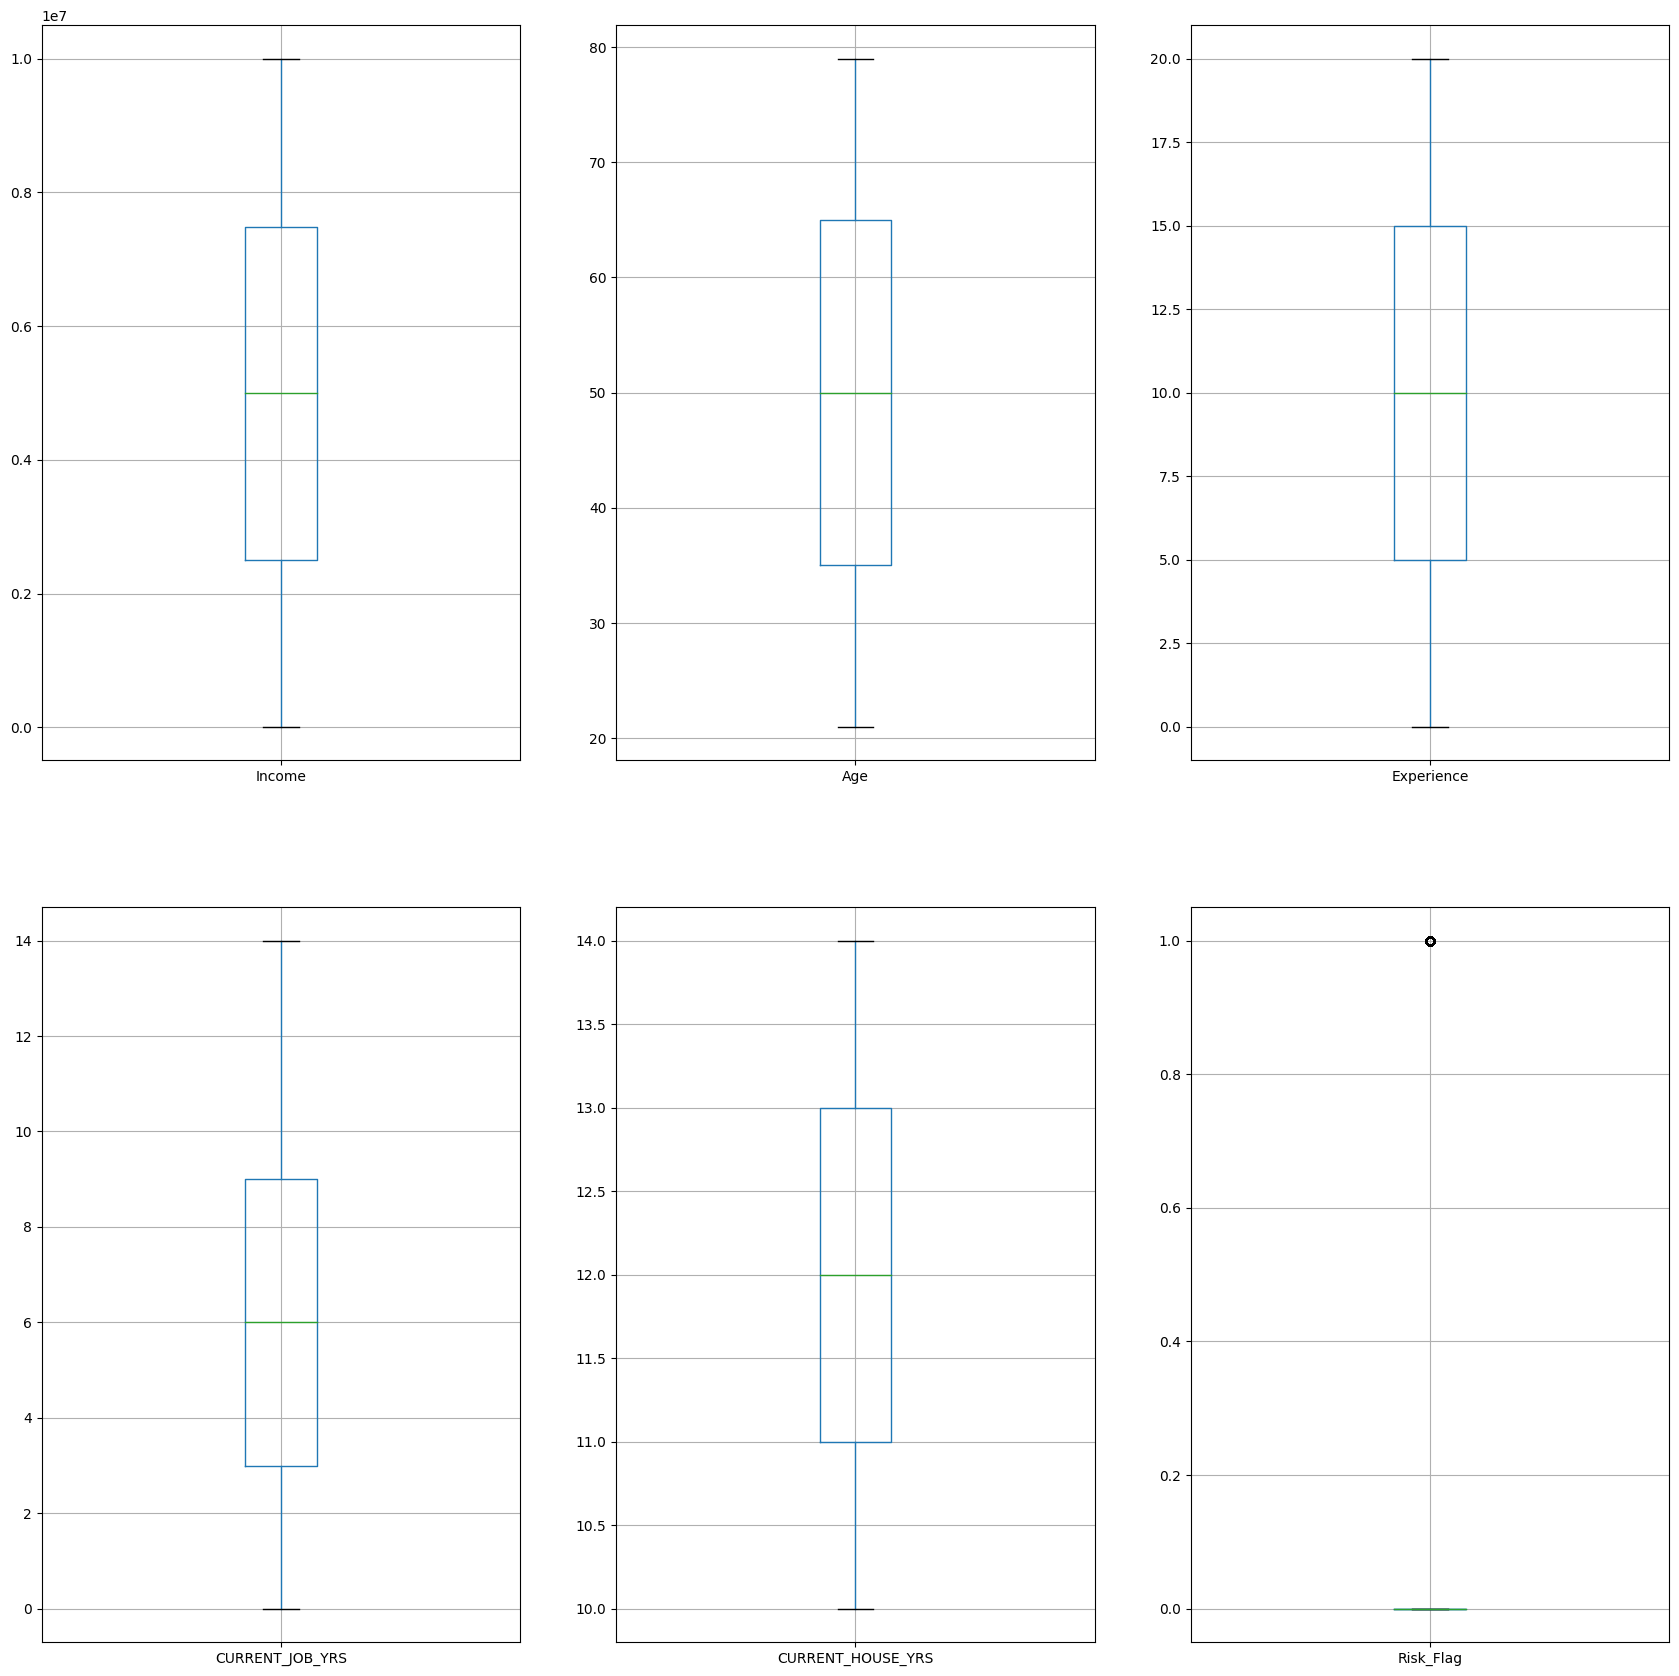

In [35]:
plt.figure(figsize=(21,21))
k=1
for feature in df_train_features:
  plt.subplot(2,3,k)
  df_train.boxplot(feature)
  k=k+1

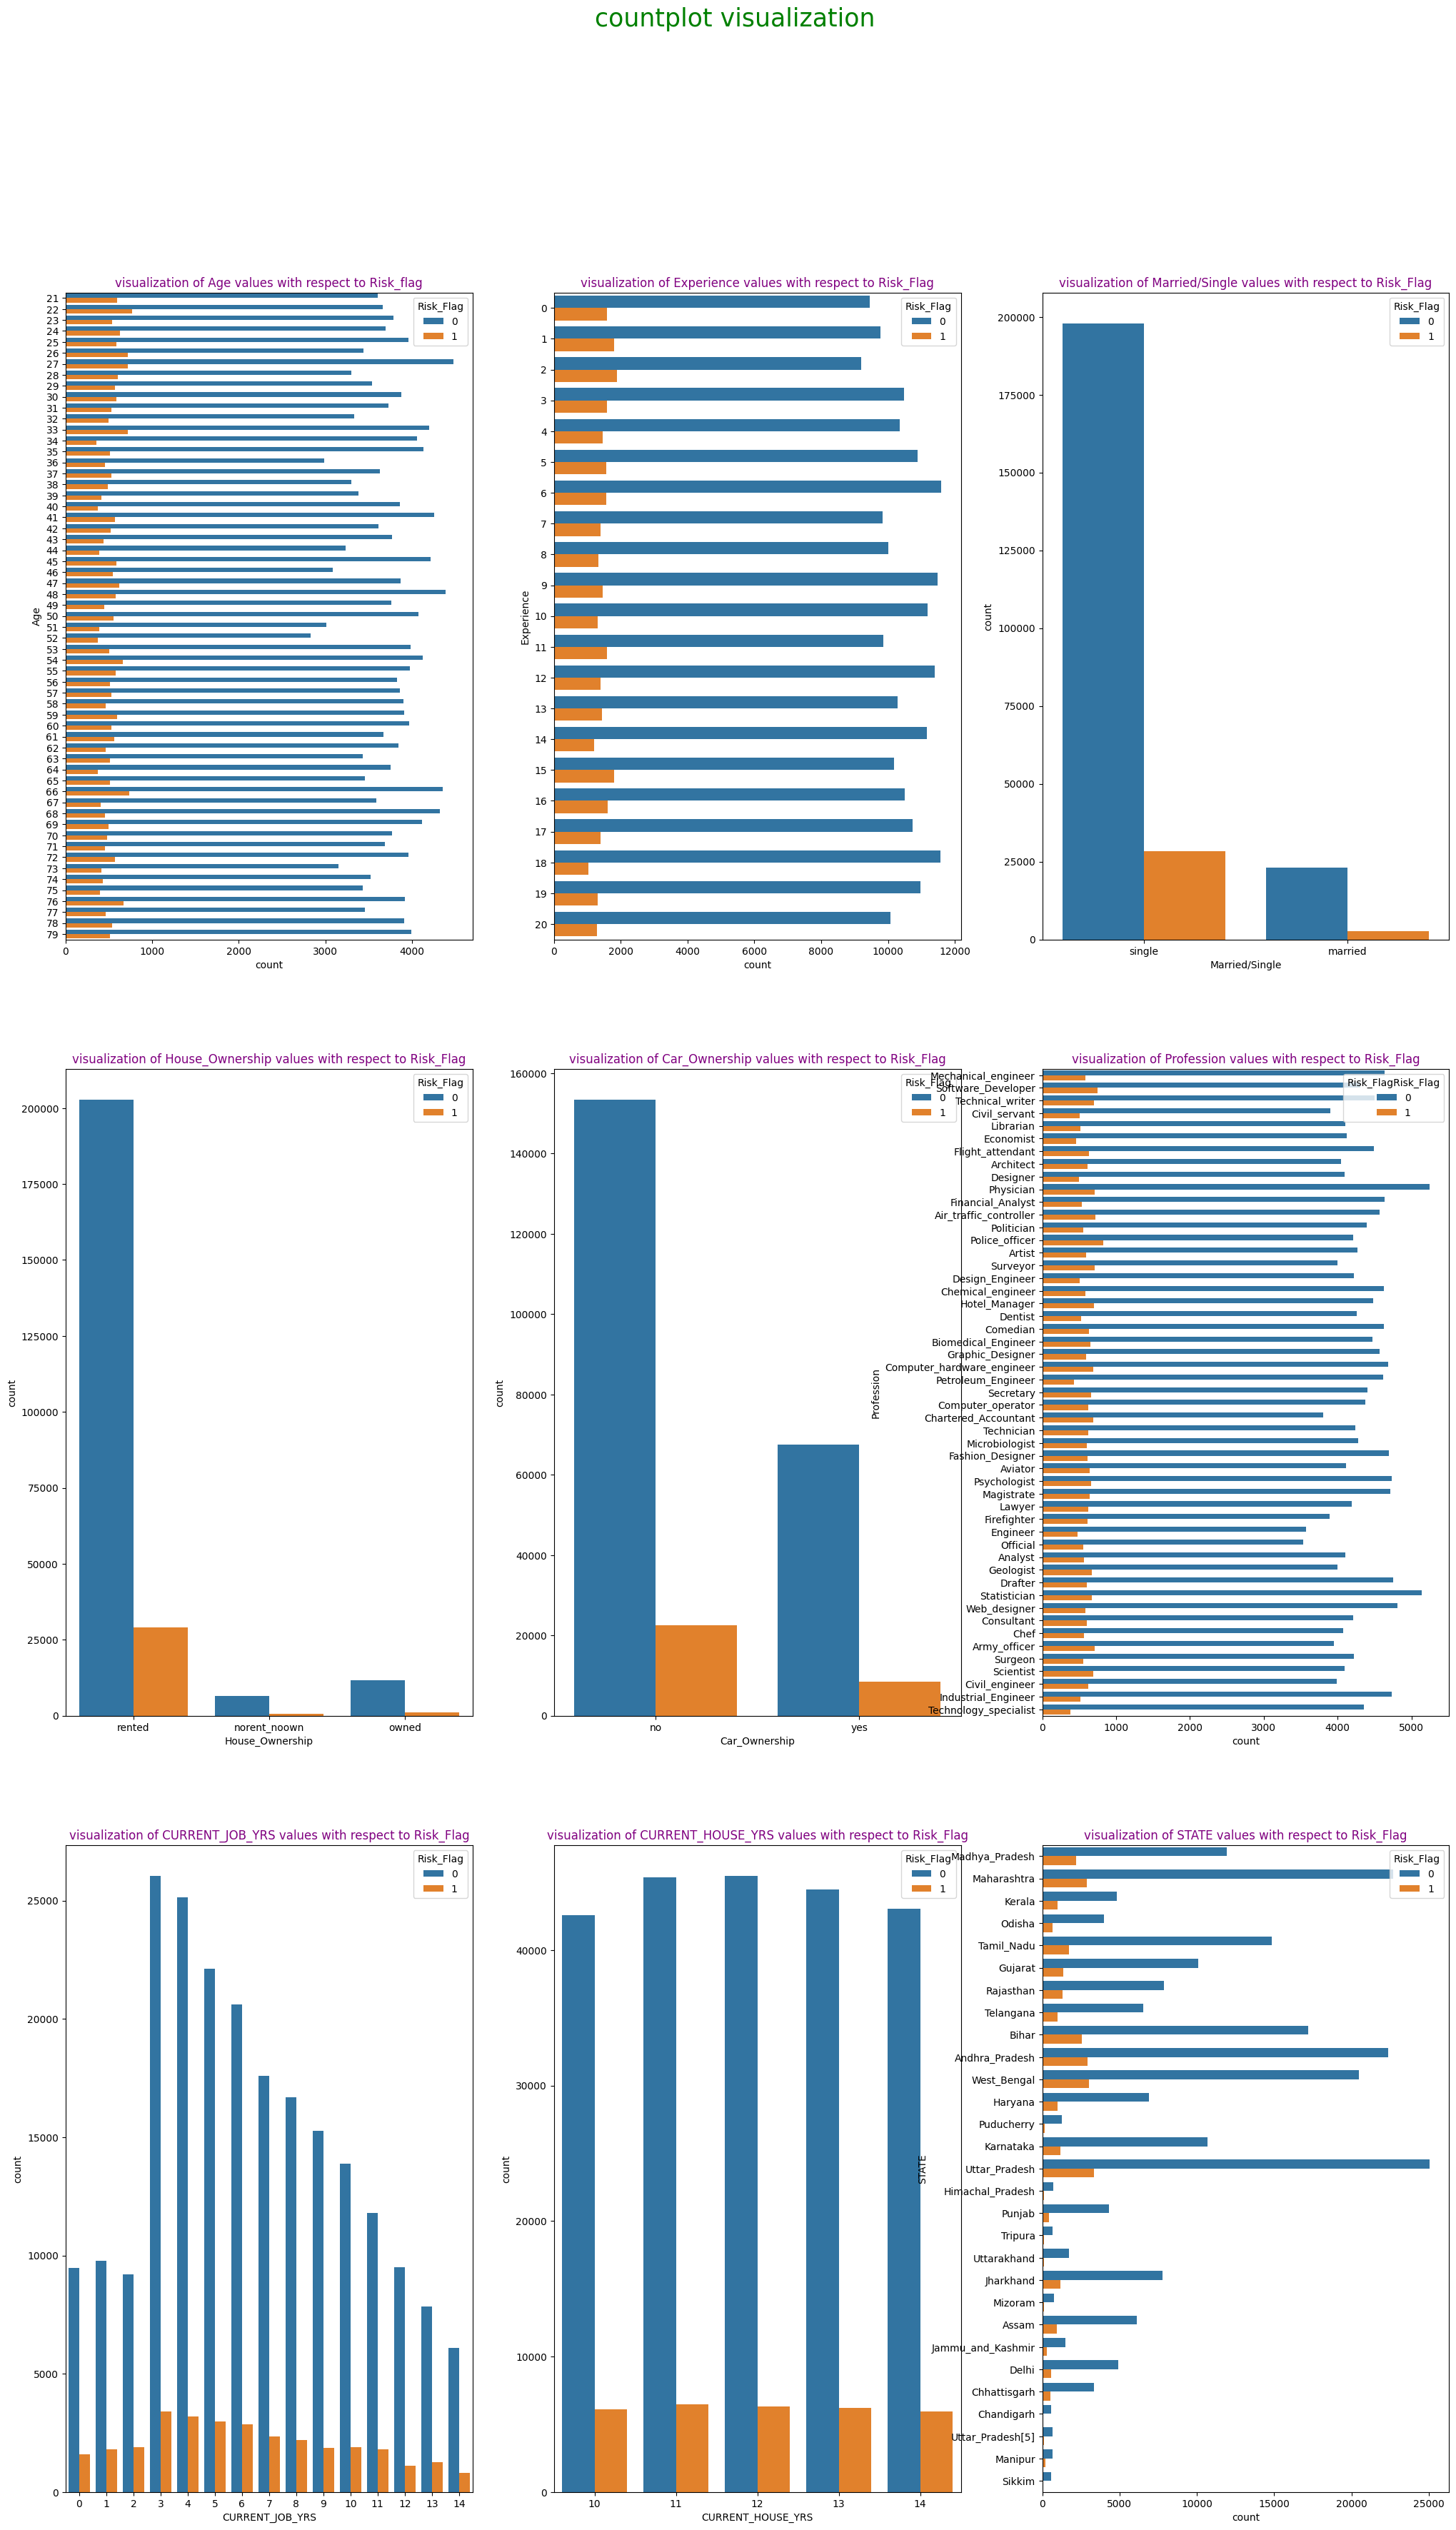

In [36]:
fig,axs=plt.subplots(nrows=3, ncols=3, figsize=(25,40));
fig.suptitle("countplot visualization", c='green', size=25)

sns.countplot(y="Age", data=df_train, hue='Risk_Flag', ax=axs[0][0])
axs[0][0].set_title("visualization of Age values with respect to Risk_flag", c='purple')
axs[0][0].legend(title="Risk_Flag", loc="upper right")

sns.countplot(y="Experience", data=df_train, hue='Risk_Flag', ax=axs[0][1])
axs[0][1].set_title("visualization of Experience values with respect to Risk_Flag", c='purple')
axs[0][1].legend(title="Risk_Flag", loc="upper right")

sns.countplot(x="Married/Single", data=df_train, hue='Risk_Flag', ax=axs[0][2])
axs[0][2].set_title("visualization of Married/Single values with respect to Risk_Flag", c='purple')
axs[0][2].legend(title="Risk_Flag", loc="upper right")

sns.countplot(x="House_Ownership", data=df_train, hue='Risk_Flag', ax=axs[1][0])
axs[1][0].set_title("visualization of House_Ownership values with respect to Risk_Flag", c='purple')
axs[1][0].legend(title="Risk_Flag", loc="upper right")

sns.countplot(x="Car_Ownership", data=df_train, hue='Risk_Flag', ax=axs[1][1])
axs[1][1].set_title("visualization of Car_Ownership values with respect to Risk_Flag", c='purple')
axs[1][1].legend(title="Risk_Flag", loc="upper right")

sns.countplot(y="Profession", data=df_train, hue='Risk_Flag', ax=axs[1][2])
axs[1][2].set_title("visualization of Profession values with respect to Risk_Flag", c='purple')
axs[1][2].legend(title="Risk_FlagRisk_Flag", loc="upper right")

sns.countplot(x="CURRENT_JOB_YRS", data=df_train, hue='Risk_Flag', ax=axs[2][0])
axs[2][0].set_title("visualization of CURRENT_JOB_YRS values with respect to Risk_Flag", c='purple')
axs[2][0].legend(title="Risk_Flag", loc="upper right")

sns.countplot(x="CURRENT_HOUSE_YRS", data=df_train, hue='Risk_Flag', ax=axs[2][1])
axs[2][1].set_title("visualization of CURRENT_HOUSE_YRS values with respect to Risk_Flag", c='purple')
axs[2][1].legend(title="Risk_Flag", loc="upper right")

sns.countplot(y="STATE", data=df_train, hue='Risk_Flag', ax=axs[2][2])
axs[2][2].set_title("visualization of STATE values with respect to Risk_Flag", c='purple')
axs[2][2].legend(title="Risk_Flag", loc="upper right")

plt.show()

<AxesSubplot: >

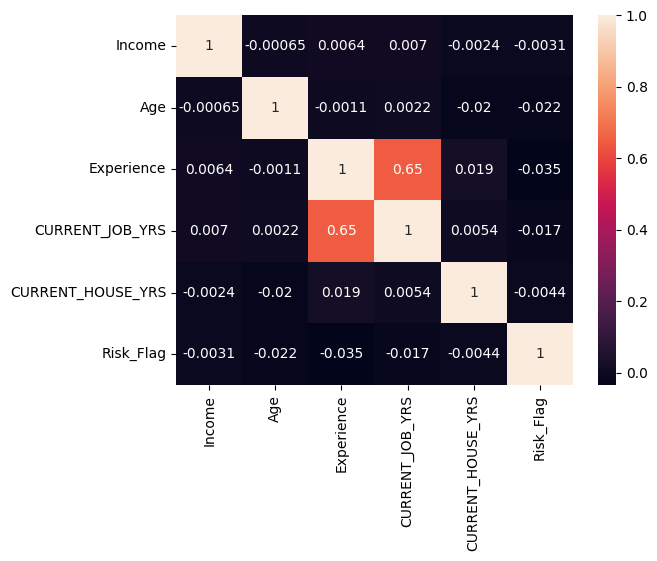

In [37]:
sns.heatmap(df_train.corr(),annot=True)

In [38]:
df_train.skew()

Income               0.005958
Age                 -0.005316
Experience          -0.012779
CURRENT_JOB_YRS      0.273146
CURRENT_HOUSE_YRS    0.006786
Risk_Flag            2.295734
dtype: float64

In [39]:
df_train.kurtosis()

Income              -1.198639
Age                 -1.204769
Experience          -1.194939
CURRENT_JOB_YRS     -0.785973
CURRENT_HOUSE_YRS   -1.274949
Risk_Flag            3.270421
dtype: float64

In [40]:
# Visualization on test data

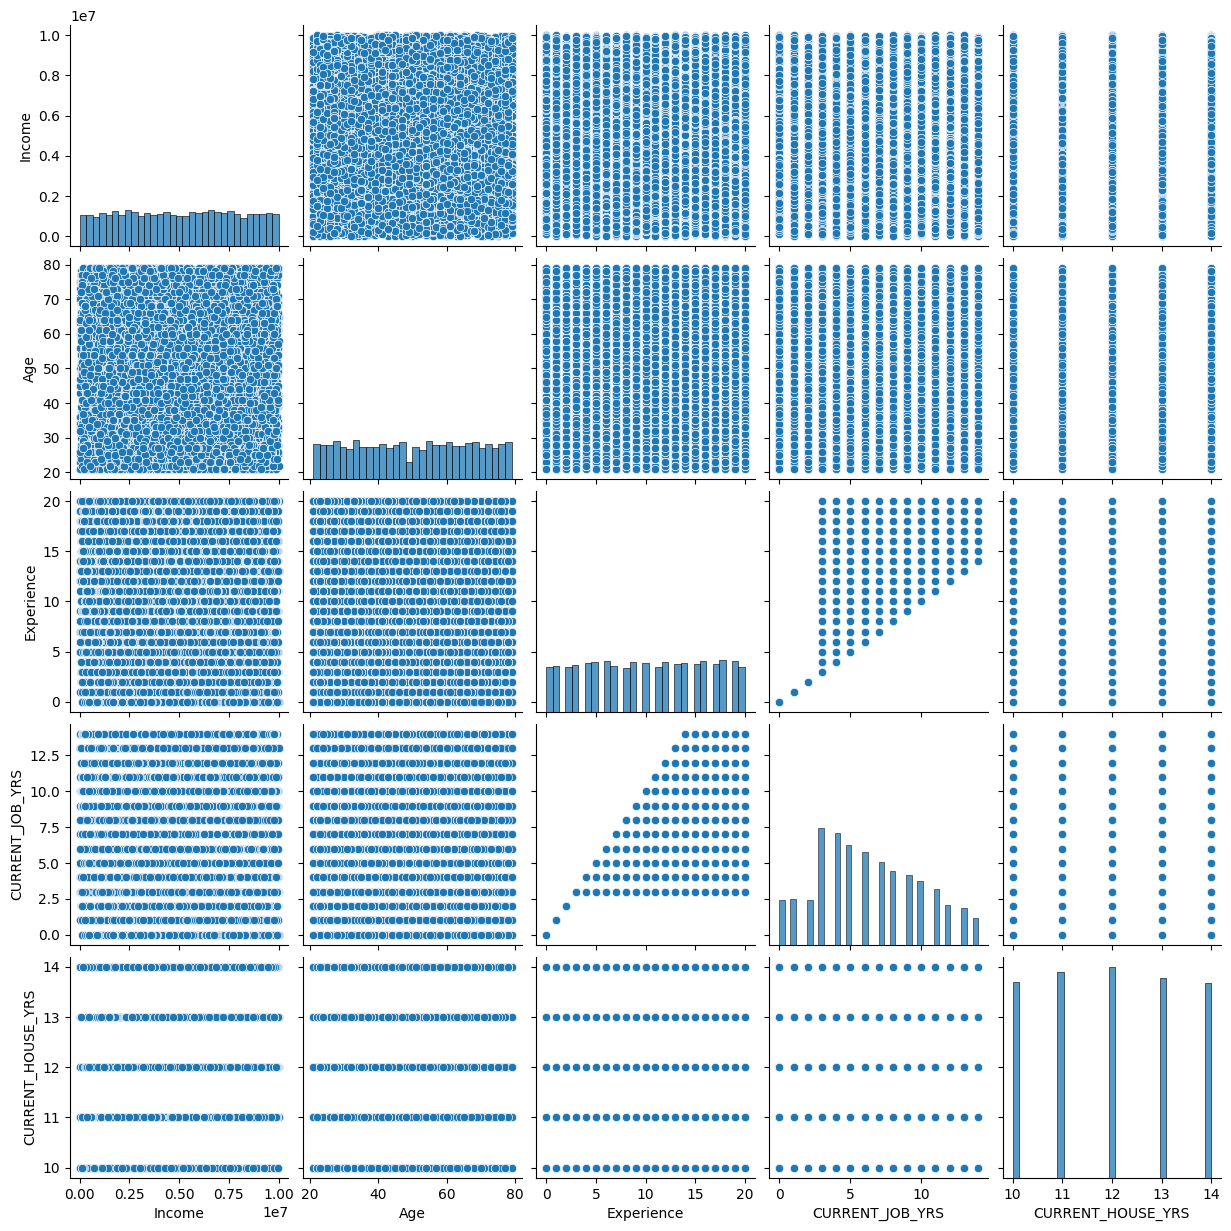

In [41]:
sns.pairplot(df_test)

In [42]:
df_test_features=['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']

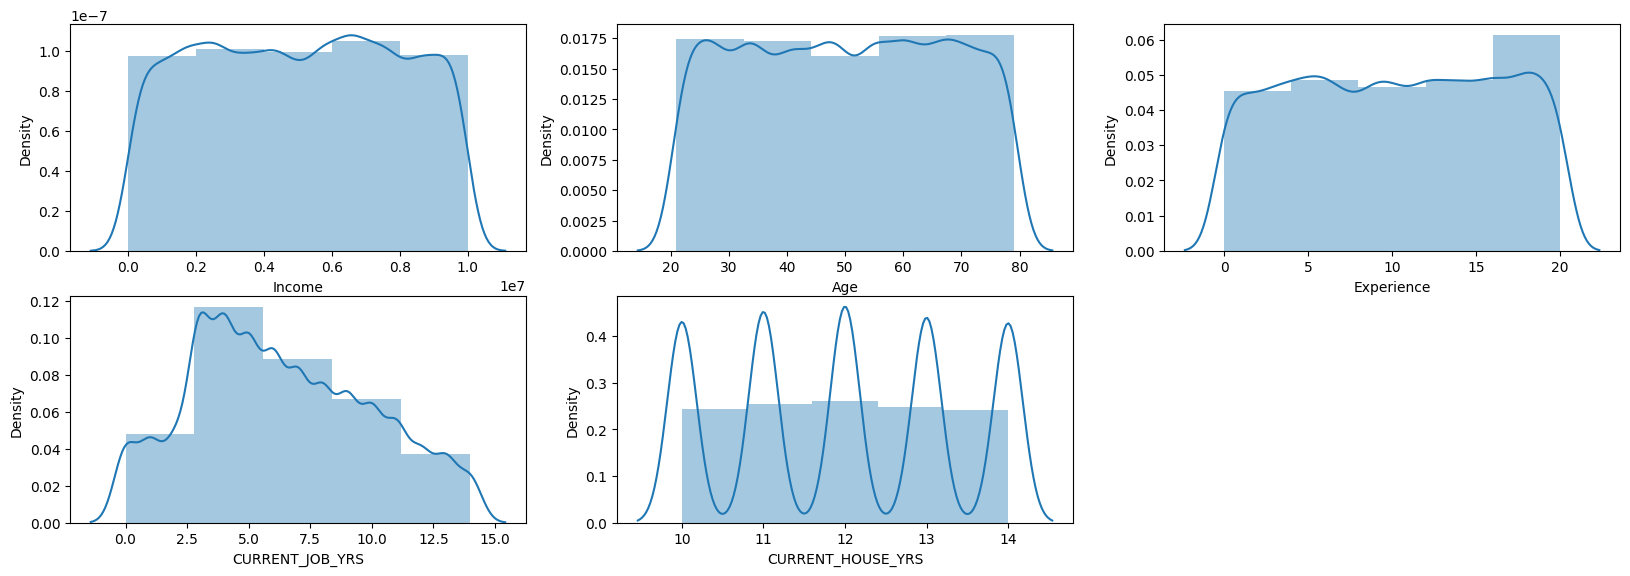

In [43]:
plt.figure(figsize=(20,10))
k=1
for feature in df_test_features:
  plt.subplot(3,3,k)
  sns.distplot(df_test[feature], bins=5, kde=True)
  k=k+1

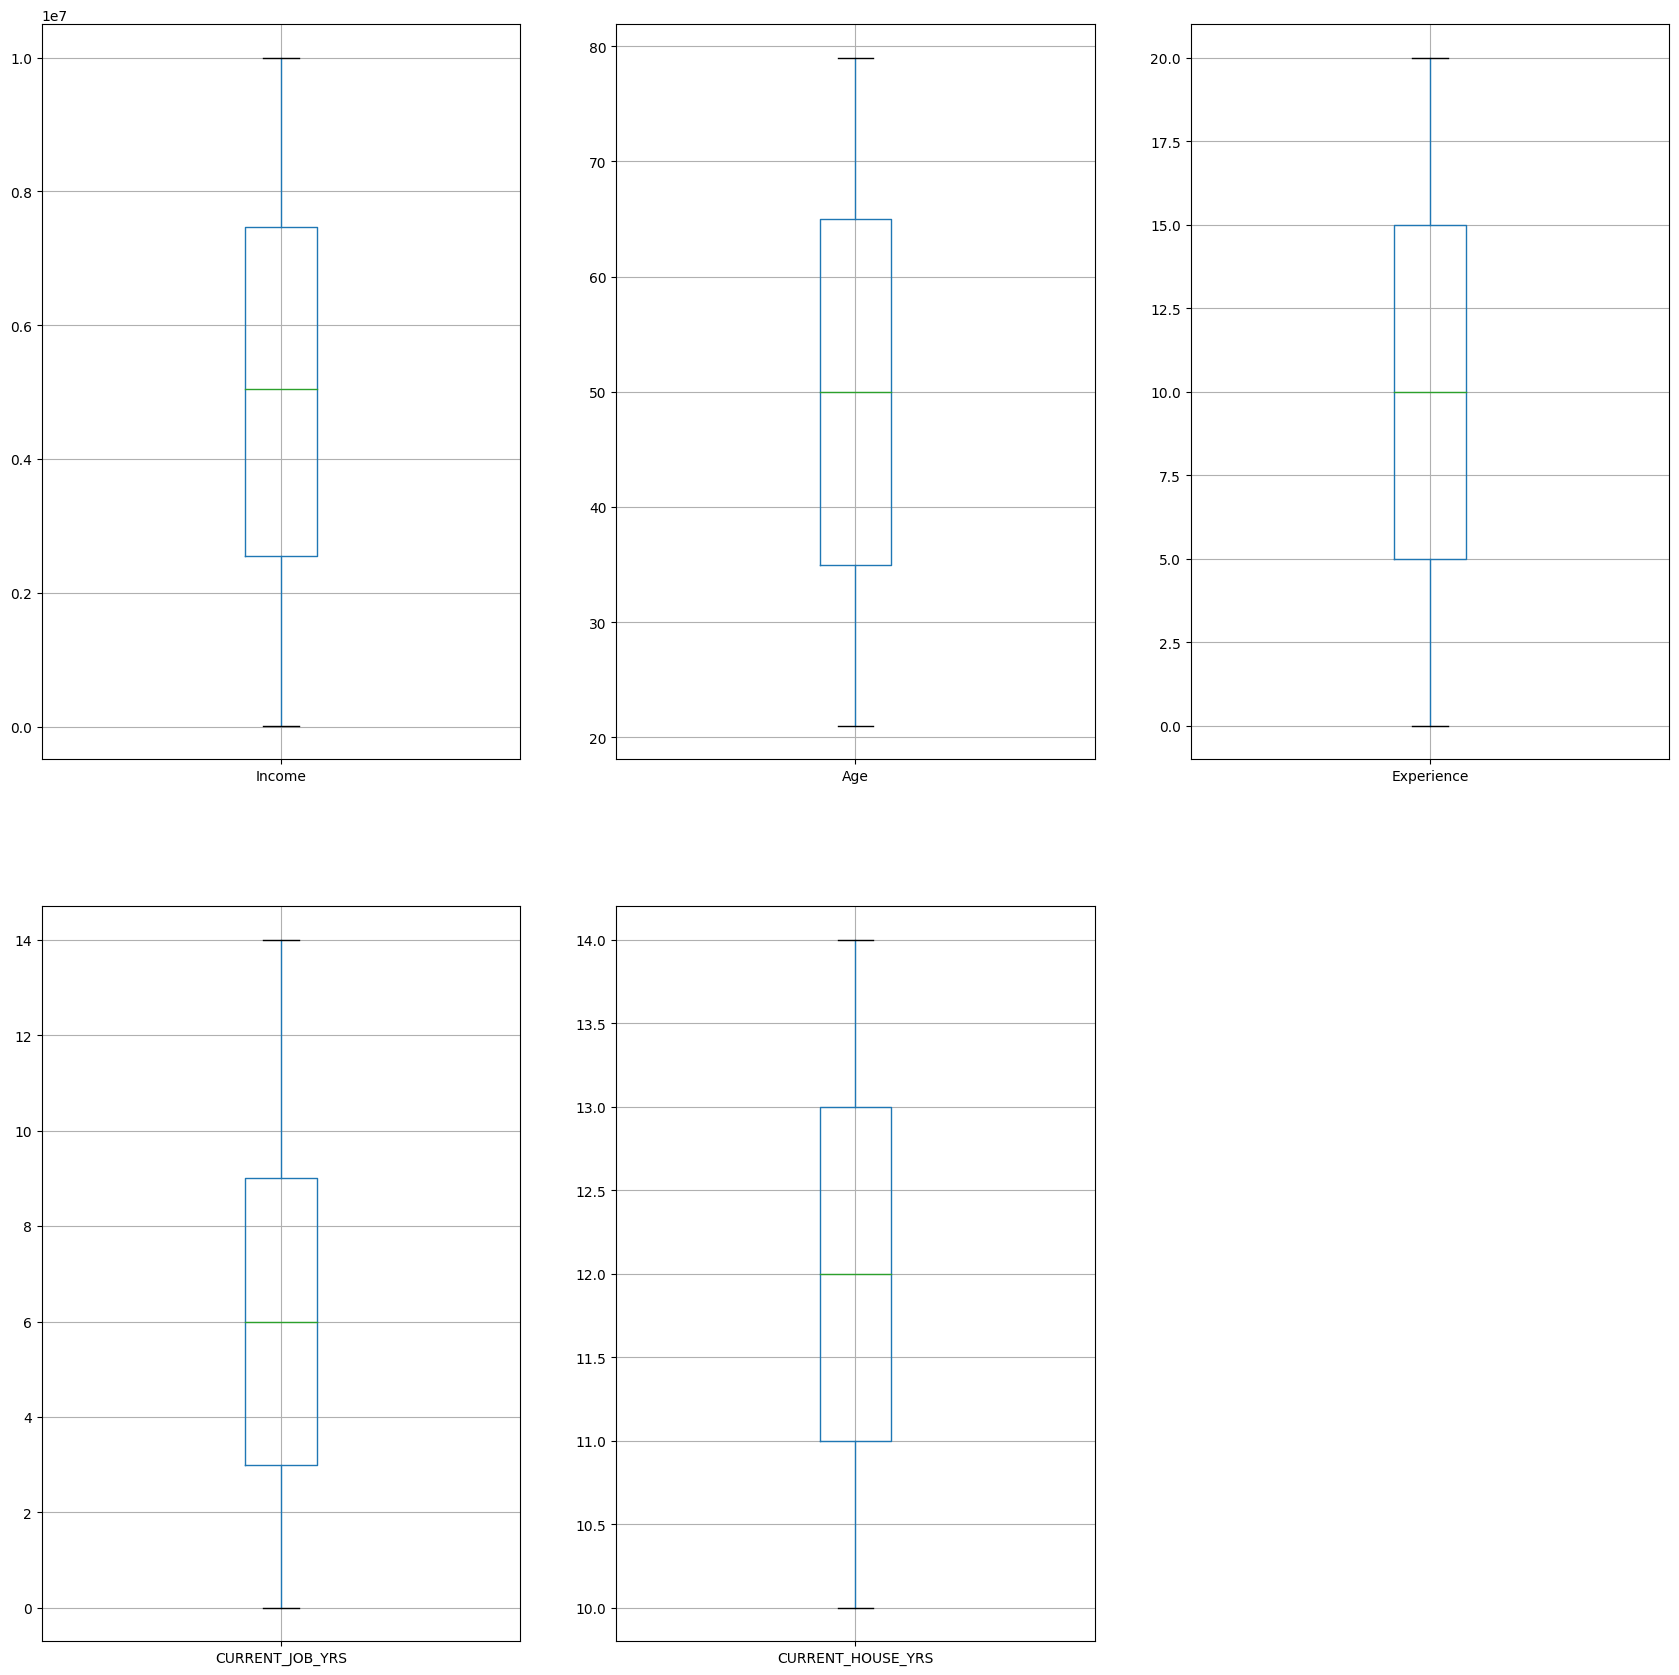

In [44]:
plt.figure(figsize=(21,21))
k=1
for feature in df_test_features:
  plt.subplot(2,3,k)
  df_test.boxplot(feature)
  k=k+1

<AxesSubplot: >

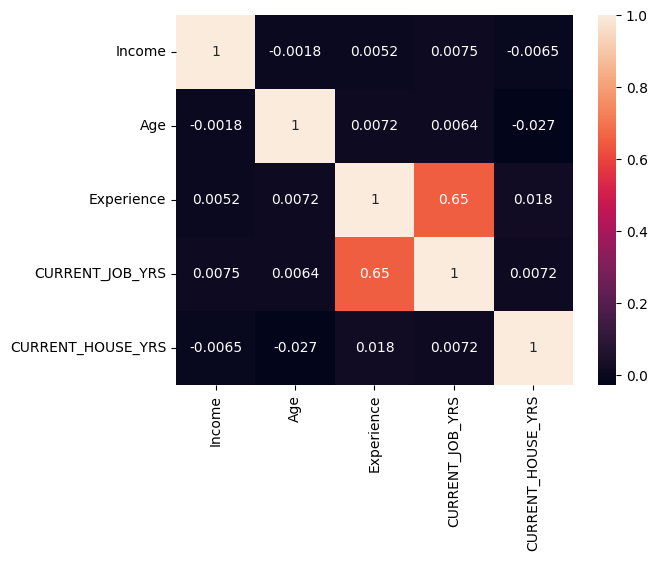

In [45]:
sns.heatmap(df_test.corr(),annot=True)

In [46]:
df_test.skew()

Income              -0.007805
Age                 -0.009766
Experience          -0.024111
CURRENT_JOB_YRS      0.264331
CURRENT_HOUSE_YRS    0.011798
dtype: float64

In [47]:
df_test.kurtosis()

Income              -1.190508
Age                 -1.207713
Experience          -1.209798
CURRENT_JOB_YRS     -0.786180
CURRENT_HOUSE_YRS   -1.269069
dtype: float64

In [48]:
#convert categorical variables to numerical on both data

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['Married/Single']=le.fit_transform(df_train['Married/Single'].values)
df_train['House_Ownership']=le.fit_transform(df_train['House_Ownership'].values)
df_train['Car_Ownership']=le.fit_transform(df_train['Car_Ownership'].values)
df_train['Profession']=le.fit_transform(df_train['Profession'].values)
df_train['CITY']=le.fit_transform(df_train['CITY'].values)
df_train['STATE']=le.fit_transform(df_train['STATE'].values)

In [50]:
df_train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,45,162,28,6,11,0
251996,2843572,26,10,1,2,0,3,251,13,6,11,0
251997,4522448,46,7,1,2,0,17,144,14,7,12,0
251998,6507128,45,0,1,2,0,27,233,18,0,10,0


In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_test['Married/Single']=le.fit_transform(df_test['Married/Single'].values)
df_test['House_Ownership']=le.fit_transform(df_test['House_Ownership'].values)
df_test['Car_Ownership']=le.fit_transform(df_test['Car_Ownership'].values)
df_test['Profession']=le.fit_transform(df_test['Profession'].values)
df_test['CITY']=le.fit_transform(df_test['CITY'].values)
df_test['STATE']=le.fit_transform(df_test['STATE'].values)

In [52]:
df_test

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,1,2,0,26,181,28,4,13
1,1215004,25,5,1,2,0,24,131,14,5,10
2,8901342,50,12,1,2,0,30,290,14,9,14
3,1944421,49,9,0,2,1,1,171,14,3,12
4,13429,25,18,1,2,1,12,39,28,13,11
...,...,...,...,...,...,...,...,...,...,...,...
27995,9955481,57,13,1,2,0,44,90,0,5,10
27996,2917765,47,9,1,2,0,47,249,13,9,14
27997,8082415,24,5,1,2,0,30,190,14,4,13
27998,9474180,51,13,1,2,1,7,47,4,13,14


# Data Split into X and Y

In [53]:
x=df_train.drop(columns=['Risk_Flag'], axis=1)
y=df_train.Risk_Flag.values

In [54]:
x

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,1,2,0,33,251,13,3,13
1,7574516,40,10,1,2,0,43,227,14,9,13
2,3991815,66,4,0,2,0,47,8,12,4,10
3,6256451,41,2,1,2,1,43,54,17,2,12
4,5768871,47,11,1,2,0,11,296,22,3,14
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,45,162,28,6,11
251996,2843572,26,10,1,2,0,3,251,13,6,11
251997,4522448,46,7,1,2,0,17,144,14,7,12
251998,6507128,45,0,1,2,0,27,233,18,0,10


In [55]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [57]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((201600, 11), (50400, 11), (201600,), (50400,))

# Standard Scaler

In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
df_test=sc.transform(df_test)

# Random Forest Model

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, criterion='gini', max_features='sqrt' ,random_state=500)

In [60]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=500)

In [61]:
y_pred = rf.predict(x_test)

In [62]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
rf.score(x_train,y_train)

0.9362896825396826

In [84]:
rf.score(x_test,y_test)

0.8999603174603175

In [63]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [64]:
#Checking accuracy score and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[42138  2121]
 [ 2921  3220]]


0.8999603174603175

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44259
           1       0.60      0.52      0.56      6141

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.75     50400
weighted avg       0.89      0.90      0.90     50400



In [66]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[1,0]
FN = cm[0,1]

In [67]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9000


In [68]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1000


In [69]:
# print precision score

precision = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(precision))

Recall or Sensitivity : 0.9521


In [70]:
# print recall score

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9521


In [71]:
# print true positive rate score

true_positive_rate = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(true_positive_rate))

Recall or Sensitivity : 0.9521


In [72]:
# print specificity

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5243


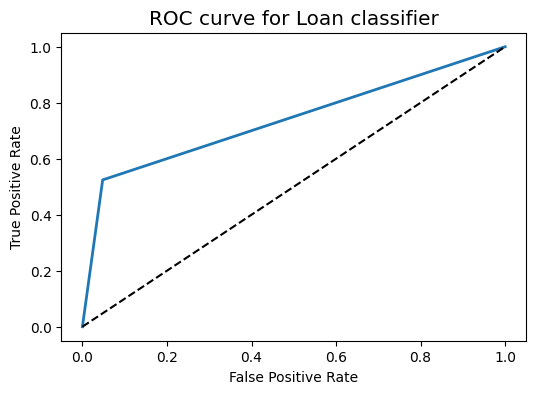

In [73]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Loan classifier')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [74]:
final_pred= rf.predict(df_test)

In [75]:
final_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
output=pd.DataFrame({'ID' : test_pass, 'risk_flag': final_pred})
output

,ID,risk_flag
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [81]:
output['risk_flag'].value_counts()

0    24888
1     3112
Name: risk_flag, dtype: int64

In [85]:
from sklearn.model_selection import KFold

In [86]:
kf=KFold(n_splits=5)

In [88]:
for train_index, test_index in kf.split(x):
    print(train_index,test_index)

[ 50400  50401  50402 ... 251997 251998 251999] [    0     1     2 ... 50397 50398 50399]
[     0      1      2 ... 251997 251998 251999] [ 50400  50401  50402 ... 100797 100798 100799]
[     0      1      2 ... 251997 251998 251999] [100800 100801 100802 ... 151197 151198 151199]
[     0      1      2 ... 251997 251998 251999] [151200 151201 151202 ... 201597 201598 201599]
[     0      1      2 ... 201597 201598 201599] [201600 201601 201602 ... 251997 251998 251999]


In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
scores=cross_val_score(rf,x,y,cv=10,scoring='accuracy')

In [91]:
scores.mean()

0.9006666666666667